In [115]:
# Importing Libraries

import numpy as np                      # linear algebra
import pandas as pd                     # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns                   # nice visualisations
import matplotlib.pyplot as plt         # basic visualisation library
import datetime as dt                   # library to opearate on dates
import gc

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import matplotlib.ticker as mtick

In [25]:
# data

art = pd.read_csv("data/articles.csv")
cust = pd.read_csv("data/customers.csv")
trans = pd.read_csv("data/transactions_train.csv")

## Single File Analysis

### Articles Database Analysis

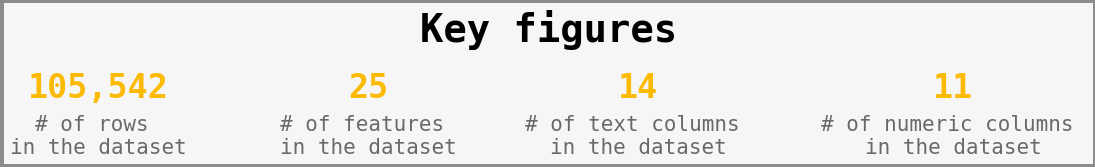

In [4]:
# Articles Key Features

data = art
art_dtypes = art.dtypes.value_counts()

fig = plt.figure(figsize=(5,2),facecolor='white')

ax0 = fig.add_subplot(1,1,1)
font = 'monospace'
ax0.text(1, 0.8, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily=font, ha='center')

ax0.text(0, 0.4, "{:,d}".format(data.shape[0]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax0.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax0.text(0.6, 0.4, "{}".format(data.shape[1]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax0.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax0.text(1.2, 0.4, "{}".format(art_dtypes[0]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax0.text(1.2, 0.001, "# of text columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font, ha='center')

ax0.text(1.9, 0.4,"{}".format(art_dtypes[1]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax0.text(1.9, 0.001,"# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

fig.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#8c8c8c')
fig.patch.set_facecolor('#f6f6f6')
ax0.set_facecolor('#f6f6f6')
    
plt.show()

In [9]:
# Visualization Function

def plot_bar(database, col, figsize=(13,5), pct=False, label='articles'):
    fig, ax = plt.subplots(figsize=figsize, facecolor='#f6f6f6')
    for loc in ['bottom', 'left']:
        ax.spines[loc].set_visible(True)
        ax.spines[loc].set_linewidth(2)
        ax.spines[loc].set_color('black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if pct:
        data = database[col].value_counts()
        data = data.div(data.sum()).mul(100)
        data = data.reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)
        ax.set_xlabel('% of ' + label, fontsize=10, weight='bold')
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    else:
        data = database[col].value_counts().reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)        
        ax.set_xlabel('# of articles' + label)
        
    ax.grid(zorder=0)
    ax.text(0, -0.75, col, color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
    ax.set_ylabel('')
        
    plt.show()

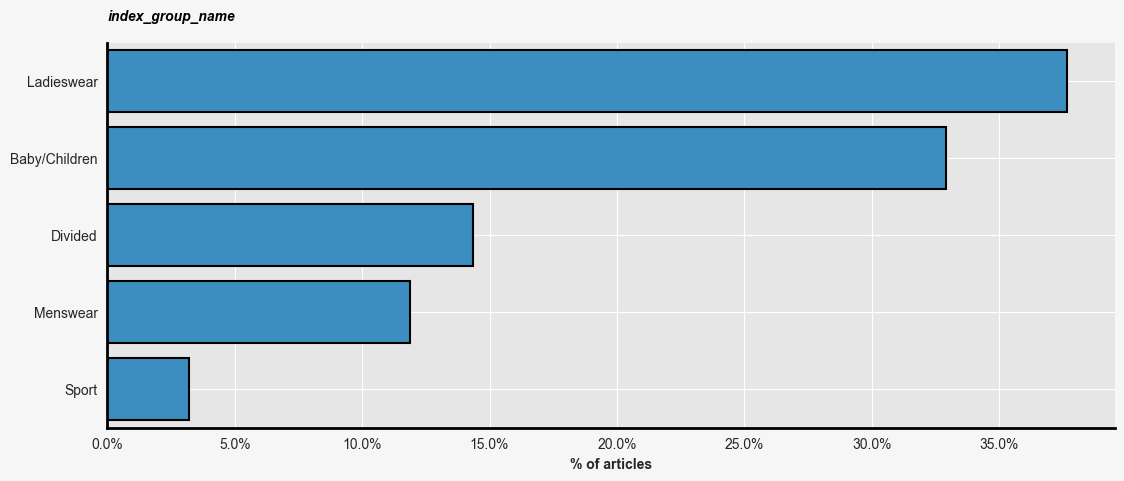

In [14]:
# Plot

plot_bar(art, 'index_group_name', pct=True)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#plot_bar(art, 'index_name', pct=True)

Most of the articles are in categories (index) of Ladieswear and Baby/Children. The smallest amount of articles is in Sport group. 

### Customer Database Analysis

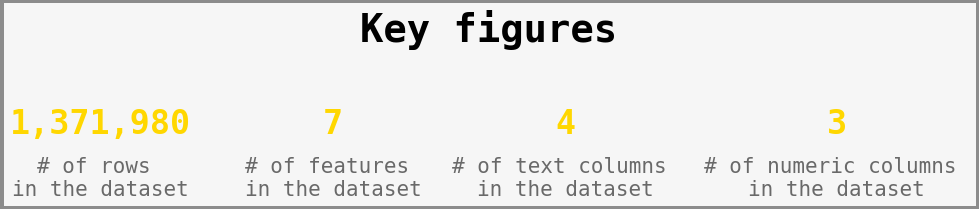

In [15]:
# Customer Key Features

mpl.rcParams.update(mpl.rcParamsDefault)

cust_dtypes = cust.dtypes.value_counts()
data = cust

fig = plt.figure(figsize=(5,2),facecolor='white')

ax0 = fig.add_subplot(1,1,1)
ax0.text(1.0, 1, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0, 0.4, "{:,d}".format(data.shape[0]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(0.6, 0.4, "{}".format(data.shape[1]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.2, 0.4, "{}".format(cust_dtypes[0]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.2, 0.001, "# of text columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.9, 0.4,"{}".format(cust_dtypes[1]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.9, 0.001,"# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)
    
fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#8c8c8c')
fig.patch.set_facecolor('#f6f6f6')
ax0.set_facecolor('#f6f6f6')

plt.show()

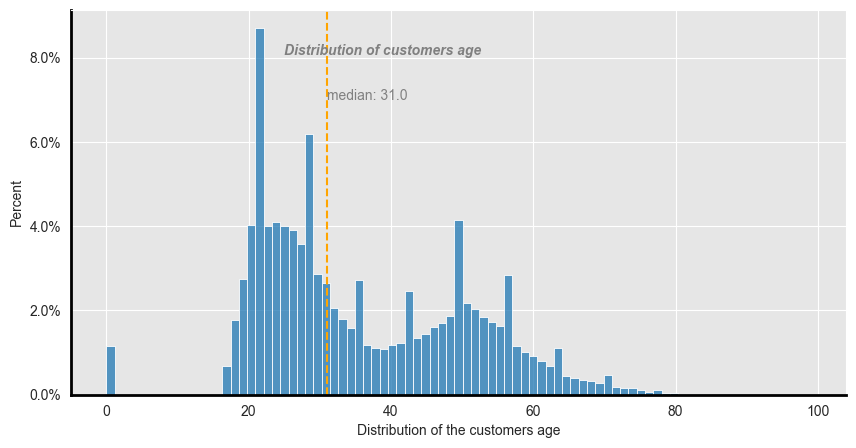

In [135]:
# Customers Age

fig, ax = plt.subplots(figsize=(10,5))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.histplot(data=cust, x='age', bins=cust['age'].nunique(), stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
median = cust['age'].median()
ax.axvline(x=median, color="orange", ls="--")
ax.text(median, 7, 'median: {}'.format(round(median,1)), rotation='horizontal', ha='left', color='grey')
ax.text(25, 8, 'Distribution of customers age', color='grey', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
plt.show()

The distribution shows that there are two main age-groups of customers: around 20-30 years old and 45-55 years old. Let's check how old is the oldest customer.

### Transactions Database Analysis

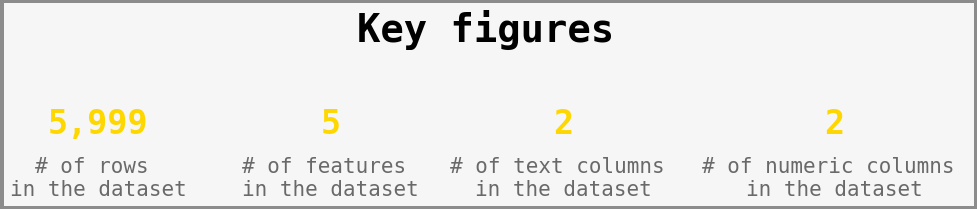

In [28]:
# Transaction Key Features

mpl.rcParams.update(mpl.rcParamsDefault)

trans_dtypes = trans.dtypes.value_counts()
data = trans

fig = plt.figure(figsize=(5,2),facecolor='white')

ax0 = fig.add_subplot(1,1,1)
ax0.text(1.0, 1, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0, 0.4, "{:,d}".format(data.shape[0]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(0.6, 0.4, "{}".format(data.shape[1]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.2, 0.4, "{}".format(trans_dtypes[0]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.2, 0.001, "# of text columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.9, 0.4,"{}".format(trans_dtypes[1]), color='gold', fontsize=24, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.9, 0.001,"# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#8c8c8c')
fig.patch.set_facecolor('#f6f6f6')
ax0.set_facecolor('#f6f6f6')
    
plt.show()

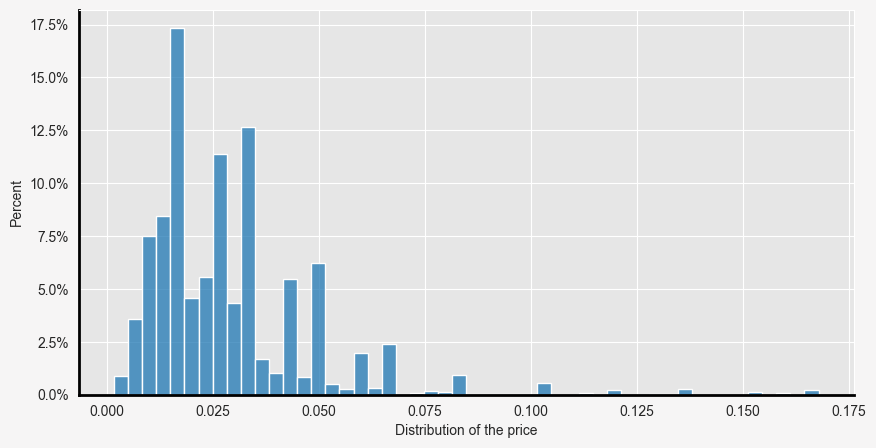

In [29]:
# Price Distribution

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
ax = sns.histplot(data=trans, x='price', bins=50, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## Combined Dataset Analysis

All 3 databases can be joined together. However, if you look closely it's not possible to connect directly databases art (with article_id as the primary key) and cust (with customer_id as the primary key). They can be joined with a bridge table trans which contains both keys article_id and customer_id.



### Fashion News Frequency

In [47]:
# data

cust_ = pd.DataFrame(cust, columns = ['club_member_status','fashion_news_frequency','customer_id'])
trans_ = pd.DataFrame(trans, columns = ['customer_id'])

# Merging
custran = pd.merge(cust_ ,trans_, how='right', on='customer_id')

ct1 = custran.groupby(['fashion_news_frequency'])['customer_id'].count().reset_index()
ct2 = ct1.sort_values(['customer_id'], ascending=False)
#ct2.head()

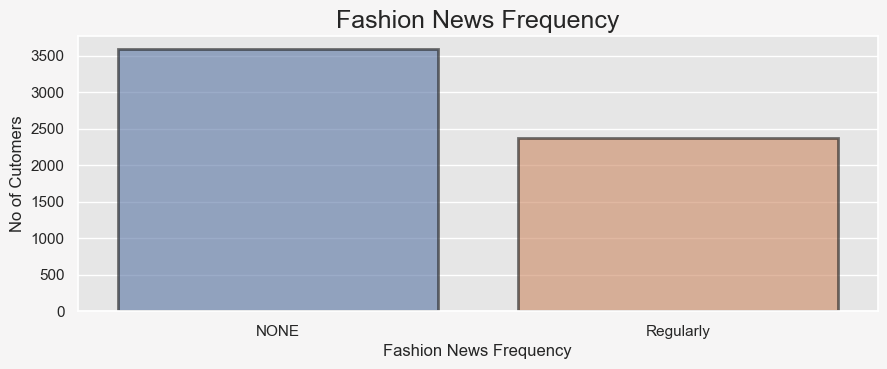

In [75]:
# Plot

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
sns.barplot(data = ct2, x = "fashion_news_frequency", y = "customer_id", alpha = 0.6, edgecolor = 'k', linewidth = 2)
ttl = ax.set_title('Fashion News Frequency', fontsize = 18)
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Cutomers')
ax.set_xlabel('Fashion News Frequency')

plt.subplots_adjust(top = 0.85, bottom = 0.3, left = 0.1, right = 0.9)
plt.show()

### Word Cloud for Descriptions

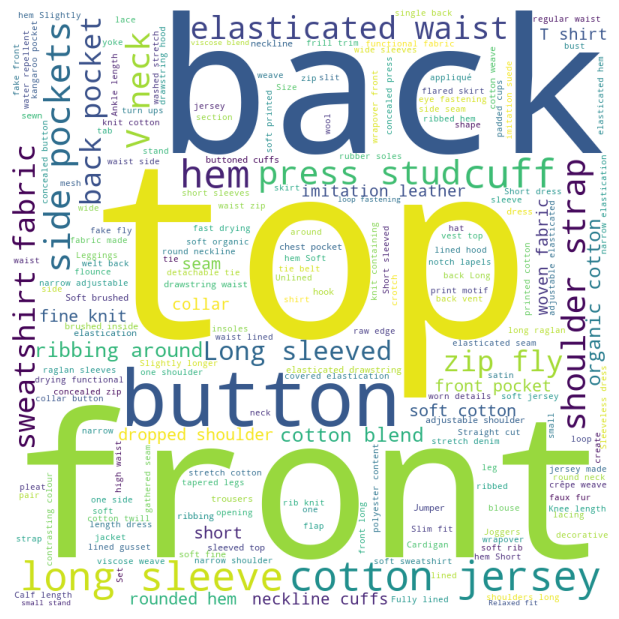

In [81]:
# word cloud

prod_desc = art[art.detail_desc.notnull()].detail_desc.sample(5000).values

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords,).generate(' '.join(prod_desc)) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

### Does customer always buy products that are less expensive?

In [101]:
# data

trans['price_band'] = pd.qcut(trans['price'], q = 4, labels = ['low','medium','high','very high'])
trans['price'] = trans['price'].astype('float32')
trans['sales_channel_id'] = trans['sales_channel_id'].astype('int32')

cust['FN'] = cust['FN'].astype('float32')
cust['Active'] = cust['Active'].astype('float32')
cust['age'].fillna(0, inplace=True)
cust['age'] = cust['age'].astype('int32')

cust_data = cust
trans_data = trans

cust_nature = trans_data.groupby(['customer_id','price_band'])['article_id'].count().reset_index(name='totalbought')
cust_price = cust_nature.groupby('price_band')['totalbought'].sum().reset_index(name='totalitems')
cust_price['perc_share'] = (cust_price['totalitems']/cust_price['totalitems'].sum())*100

# Plot
import plotly.express as px
fig = px.pie(cust_price, values='perc_share', names='price_band', title='% Share by Product Price Type')
fig.show()

Most of the products that the customer buy are with in the range of medium priced products followed by low and very high value products. Now we can slice and dice and understand which segment of customers contribute to most of the revenue H&M.

New Customers - This segment of customers are the customers who are on the website trying out the platform for the first time and they will move into one of the below categories based on the experience.

Returning customers - These are the core customers for any business as they contribute to most of the revenue. These are the segment of customers who keep coming back to the website to buy products at regular intervals

Reactivated Customers - This segment of customers are those who havent visited the website in a long time and they have come back to the website because of any marketing activities or any other trigger.Normally the period can vary but some business takes 365 days as reactivation time which means any customer who havent visited the website in the past 365 days and they visit the website they become reactivated customers.

Churn Customers - These are short lived customers where the product couldnt establish a long term relationship with the customers. They might have come to the website because of a promotional email or a display campaign and mostly would have done a 1 time purchase or just browsed the website. The churn period differs for different business but some of them take 180 or 365 days as the ideal period that consider that the customer have churned

### Total Vs Transacting Customers

In [158]:
# data
transactions_train = trans
customers = cust

# colour_group_name
transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])
transactions_train['year'] = transactions_train['t_dat'].dt.year
transactions_train['mon'] = transactions_train['t_dat'].dt.month
transactions_train['day'] = transactions_train['t_dat'].dt.day

In [164]:
# Total Customers
customers['age_bucket'] = pd.cut(customers['age'], bins = [15, 18, 25, 30, 40, 50, 100])

# Transacting Customers in each bucket
a = transactions_train[['customer_id']]
b = customers[['customer_id', 'age_bucket']]
c = pd.merge(a, b, how = 'inner', on = 'customer_id')
c = c.groupby(by = 'age_bucket').agg({'customer_id':'nunique'}).reset_index()

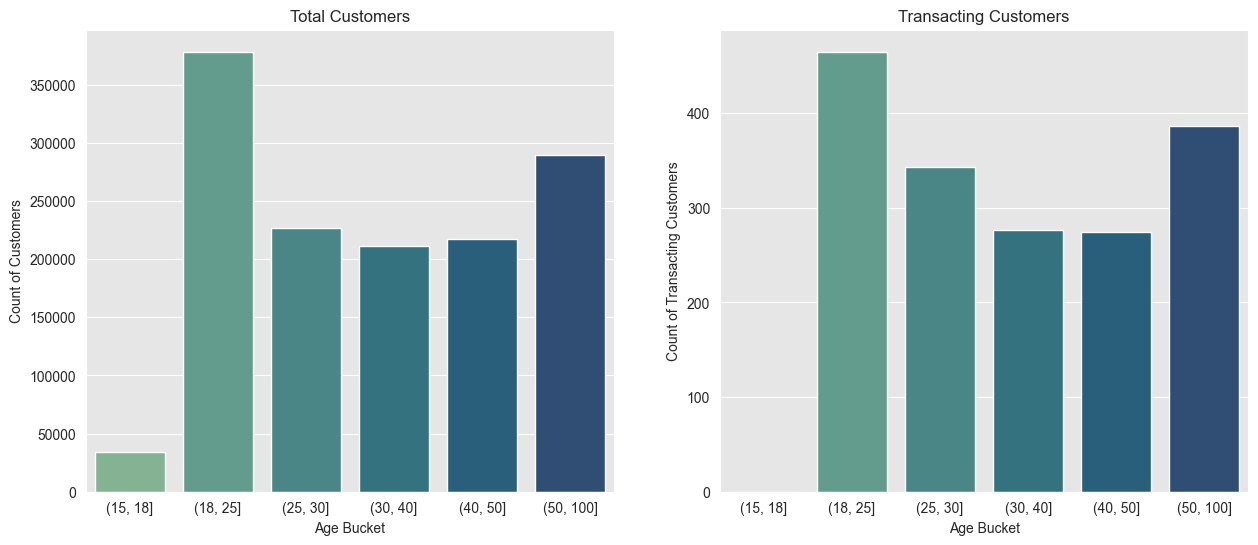

<Figure size 1500x600 with 0 Axes>

Text(0, 0.5, 'Count of Transacting Customers')

In [166]:
# Plot

plt.figure(figsize=(15, 6))
plt.show()
plt.subplot(1, 2, 1)
sns.countplot(data = customers, x='age_bucket', palette='crest')
plt.title('Total Customers')
plt.xlabel('Age Bucket')
plt.ylabel('Count of Customers')

plt.subplot(1, 2, 2)
sns.barplot(data =c, x='age_bucket', y = 'customer_id', palette='crest')
plt.title('Transacting Customers')
plt.xlabel('Age Bucket')
plt.ylabel('Count of Transacting Customers')

Count of Total Customers and Transacting Customers is almost same.

### Article Group - Stock vs Yearly Sales Percentage

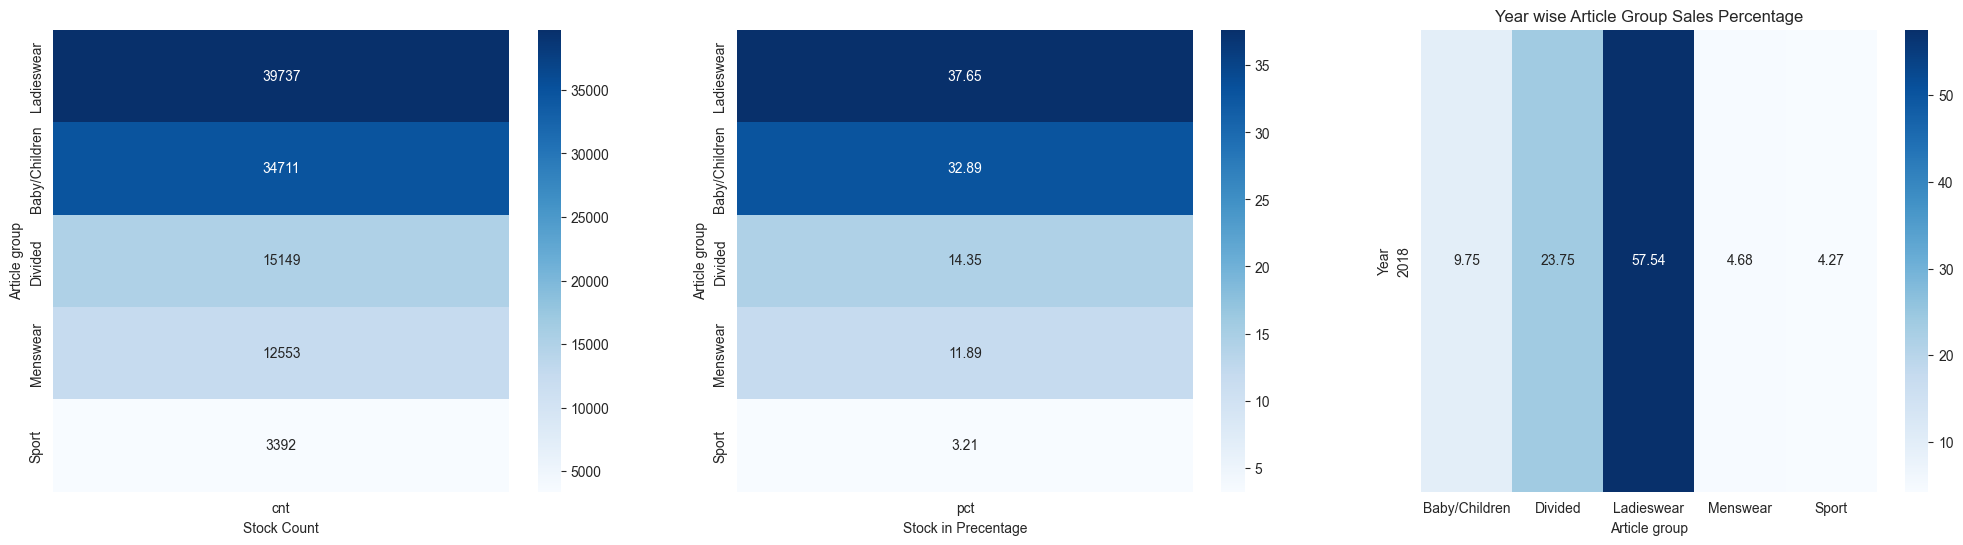

In [170]:
transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'], infer_datetime_format=True)
transactions_train['year'] = transactions_train['t_dat'].dt.year
transactions_train['mon'] = transactions_train['t_dat'].dt.month
transactions_train['day'] = transactions_train['t_dat'].dt.day
a = transactions_train[['article_id', 'year']]
b = art[['article_id', 'index_group_name']]
c = pd.merge(a, b, how = 'inner')
d = c.pivot_table(index='year', columns='index_group_name', values = 'article_id', aggfunc='count')
d['total'] = d.sum(axis=1)
d.iloc[:, 0] = np.round((d.iloc[:, 0]/d['total'])*100, 2)
d.iloc[:, 1] = np.round((d.iloc[:, 1]/d['total'])*100, 2)
d.iloc[:, 2] = np.round((d.iloc[:, 2]/d['total'])*100, 2)
d.iloc[:, 3] = np.round((d.iloc[:, 3]/d['total'])*100, 2)
d.iloc[:, 4] = np.round((d.iloc[:, 4]/d['total'])*100, 2)
d.drop(['total'], axis = 1, inplace=True)

e = pd.DataFrame(art[['index_group_name']].value_counts())
e.columns = ['cnt']
e['pct'] = np.round((e['cnt']/e['cnt'].sum())*100, 2)

plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.heatmap(e[['cnt']], cmap='Blues', annot=True, fmt='d')
plt.xlabel('Stock Count')
plt.ylabel('Article group')

plt.subplot(1, 3, 2)
sns.heatmap(e[['pct']], cmap='Blues', annot=True, fmt='g')
plt.xlabel('Stock in Precentage')
plt.ylabel('Article group')

plt.subplot(1, 3, 3)
sns.heatmap(d, annot=True, cmap='Blues', fmt='g')
plt.title("Year wise Article Group Sales Percentage")
plt.xlabel('Article group')
plt.ylabel('Year')
plt.show()

LadiesWear are top in both stock and Sales Percentage.
In Stock Baby/Children group is almost equal to LadiesWear, however for Baby/Children group Sales is low as compared to items in stock.

### Top Selling Color Analysis

In [172]:
# data

a = transactions_train[['article_id', 't_dat', 'year', 'mon']]
b = art[['article_id', 'colour_group_name']]
c = pd.merge(a, b, how = 'inner', on = ['article_id']).reset_index()

In [173]:
# color wise count

c['colour_group_name'].value_counts()

Black              2053
Dark Blue           630
White               501
Grey                255
Blue                242
Dark Red            230
Dark Grey           181
Light Blue          174
Light Pink          169
Red                 157
Dark Green          143
Light Beige         140
Pink                128
Beige               116
Greenish Khaki      116
Light Grey          102
Yellow               98
Off White            94
Dark Turquoise       54
Dark Pink            47
Light Orange         44
Yellowish Brown      39
Light Turquoise      28
Dark Orange          28
Green                27
Gold                 22
Dark Beige           20
Orange               17
Other                17
Dark Purple          17
Other Pink           16
Silver               15
Turquoise            13
Dark Yellow          10
Light Purple          9
Light Yellow          9
Light Green           8
Other Red             7
Greyish Beige         5
Other Purple          4
Purple                3
Light Red       